<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Artificial Neural Networks

### [Luis Martí](http://lmarti.com)
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
$\newcommand{\vec}[1]{\boldsymbol{#1}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set_style('whitegrid')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import random, itertools
random.seed(a=42)

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
# tikzmagic extesion for figures - https://github.com/mkrphys/ipython-tikzmagic
%load_ext tikzmagic
# for rendering graphviz dot files - https://github.com/cjdrake/ipython-magic
%load_ext gvmagic

# Why to study bio-inspired methods

* Nature is one of the best problem-solvers we know.
* Evolutionary optimization.
* Natural intelligence and artificial intelligence
    * Cellular automata
    * **Neural computation**
    * Evolutionary computation
    * Swarm intelligence
    * Artificial immune systems
    * Membrane computing
    * Amorphous computing

## Pigeons as art connoisseurs (Watanabe et al., 1995)
* Pigeons were put in a Skinner box, and
* presented with photos of paintings by Monet and Picasso. 
* They were rewarded if they recognized correctly the painter they were presented with.
<hr/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-4" align='center'><div class='well well-sm'>
      [Skinner box](https://en.wikipedia.org/wiki/Operant_conditioning_chamber)
      <img class='img-thumbnail' width='96%' src='imgs/05/pigeon.png'/>
      </div></div>
      <div class="col-md-4" align='center'><div class='well well-sm'>
      [Claude Monet](https://en.wikipedia.org/wiki/Claude_Monet)
      <img class='img-thumbnail' src='imgs/05/monet.jpg'/>
      </div></div>
      <div class="col-md-4" align='center'><div class='well well-sm'>
      [Pablo Picasso](https://en.wikipedia.org/wiki/Pablo_Picasso)
      <img class='img-thumbnail' width='83%' src='imgs/05/picasso.jpg'/>
      </div></div>
  </div>
</div>

<small>Watanabe, S., Sakamoto, J., &amp; Wakita, M. (1995). Pigeons’ discrimination of paintings by Monet and Picasso. Journal of the Experimental Analysis of Behavior, 63(2), 165–174. http://doi.org/10.1901/jeab.1995.63-165</small>

## Results

* Pigeons were capable of discriminate between painters with an accuracy of **95%** when confronted with paintings on the **training set**.
* Surprinsingly, they scored a **85%** on paintings they had never seen during training (**validation set**).
* They were not just learning exhaustively which painting belonged to each painter.
* They were able to recognize **styles** or **patterns** and
* to **generalize** from what they had seen before.

> In AI, we have been trying to replicate this capacity (and many others) in a computer for about 60 years.

# Artificial neural networks

* Inspired (at different degrees) on the brain and the nervous system.
* Massive parallelization of relatively simple processing units.
* Simple principles lead to complex behaviours.
* Capable of learn form data.

## Creating [artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron) 

Artificial neurons are designed to mimic aspects of their biological counterparts.
<hr/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-4" align='center'><div class='well well-sm'>
      <img class='img-thumbnail' src='imgs/05/Complete_neuron_cell_diagram_en.svg'/>
      </div></div>
      <div class="col-md-8">
<ul>
<li>**Dendrites** – act as the input receptor, allowing the cell to receive signals from a large (>1000) number of neighboring neurons. Each dendrite is able to perform a "multiplication" by that dendrite's "weight value."

<li>**Soma** – acts as a summation function. As positive and negative signals (exciting and inhibiting, respectively) arrive in the soma from the dendrites they are added together.

<li>**Axon** – gets its signal from the summation behavior which occurs inside the soma. The opening to the axon  samples the electrical potential inside the soma. Once the soma reaches a certain potential, the axon will transmit an all-in signal pulse down its length. 
<li>In this regard, the axon behaves as the ability for us to connect our artificial neuron to other artificial neurons.
</ul>
</div>
</div>
</div>



#### Note:

* Unlike most artificial neurons, biological neurons fire in discrete pulses. 
* Each time the electrical potential inside the soma reaches a certain threshold, a pulse is transmitted down the axon. 
* This pulsing can be translated into continuous values. The rate (activations per second, etc.) at which an axon fires converts directly into the rate at which neighboring cells get signal ions introduced into them. 
* The faster a biological neuron fires, the faster nearby neurons accumulate electrical potential (or lose electrical potential, depending on the "weighting" of the dendrite that connects to the neuron that fired). 
* It is this conversion that allows computer scientists and mathematicians to simulate biological neural networks using artificial neurons which can output distinct values (often from −1 to 1).

The first artificial neuron was the **Threshold Logic Unit (TLU)**, proposed by McCulloch and Pitts (1943). 
* The model was specifically targeted as a computational model of the "nerve net" in the brain.
* As a transfer function, it employed a threshold, equivalent to using the Heaviside step function. 
* A simple model was considered, with binary inputs and outputs, and 
* restrictions on the possible weights, and a more flexible threshold value.

* Any boolean function could be implemented by networks of such devices, what is easily seen from the fact that one can implement the `AND` and `OR` functions, and use them in the disjunctive or the conjunctive normal form. 
* Cyclic TLU networks, with feedbacks through neurons, could define dynamical systems with memory, but
* most research concentrated (and still does) on strictly feed-forward networks because of the smaller difficulty they pose.

<small>McCulloch, W. and Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, 5:115–133. http://link.springer.com/article/10.1007%2FBF02478259</small>

## Artificial neuron as a neuron abstraction

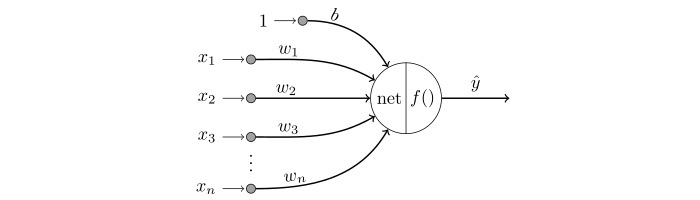

In [4]:
%tikz -s 700,200 -sc 1.0 -l shapes,calc,shapes,arrows -f svg \input{imgs/05/neuron.tikz}

In general terms, an input $\vec{x}\in\mathbb{R}^n$ is multiplied by a weight vector $\vec{w}$ and added a bias $b$ producing the net activation, $\text{net}$. $\text{net}$ is passed to the *activation function* $f()$ that computed the neuron's output $\hat{y}$.
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right).
$$

**Note:** This is a rather simplistic approximation of natural neurons. See [Spiking Neural Networks](https://en.wikipedia.org/wiki/Spiking_neural_network) for a more biologically plausible representation.

# The Perceptron

The [Perceptron](https://en.wikipedia.org/wiki/Perceptron) and its learning algorithm pioneered the research in neurocomputing.

* The perceptron is an algorithm for learning a linear binary classifier. 
* That is a function that maps its input $\vec{x}\in\mathbb{R}^n$ (a real-valued vector) to an output value $f(\vec{x})$ (a single binary value) as,

$$
f(\vec{x}) = \begin{cases}
                1 & \text{if }\vec{w} \cdot \vec{x} + b > 0\,,\\
                0 & \text{otherwise};
             \end{cases}
$$

where $\vec{w}$ is a vector of real-valued *weights*, $\vec{w} \cdot \vec{x}$ is the *dot product* $\sum_{i=1}^n w_i x_i$, and $b$ is known as the *bias*. 

## Perceptron learning

Learning goes by calculating the prediction of the perceptron, $\hat{y}$, as

$$\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,.$$

After that, we update the weights and the bias using the perceptron rule:

$$
\begin{align*}
w_i & = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
b & = b + \alpha (y - \hat{y})\,.
\end{align*}
$$

Here $\alpha\in\left(0,1\right]$ is known as the *learning rate*.

## Mark I: The Perceptron implementation

<hr/>
<div class="container-fluid">
   <div class="col-md-1">&nbsp;</div>
  <div class="row">
      <div class="col-md-4">
      <div class='well well-sm'>
              <img src='imgs/04/mark1.png'/>
      </div>
      </div>
      <div class="col-md-6">
      <ul><li>An array of cadmium sulfide photocells was used for capturing 20x20 (400) pixel images that were used as inputs.
      <li>A switchboard was used for manually selecting which input elements (pixels) were passed to the perceptrons.
      <li>They used potentiometers as variable weights.
      <li>Electric motors automatically modified the weights.</ul>
      </div>
      <div class="col-md-1">&nbsp;</div>
  </div>
</div>

# Implementing the Perceptron

We are going to start implementing a perceptron as a class. 

In [5]:
class Perceptron:
    'A simple Perceptron implementation.'
    def __init__(self, weights, bias, alpha=0.1):
        self.weights = weights
        self.bias = bias
        self.alpha = alpha
    
    def propagate(self, x):
        return self.activation(self.net(x)) 
        
    def activation(self, net):
        if net > 0:
            return 1
        return 0
    
    def net(self, x):
        return np.dot(self.weights, x) + self.bias
    
    def learn(self, x, y):
        y_hat = self.propagate(x)
        self.weights = [ w_i + self.alpha*x_i*(y-y_hat) for (w_i, x_i) in zip(self.weights, x)]
        self.bias = self.bias + self.alpha*(y-y_hat)
        return np.abs(y_hat - y)

**Note**: Bear in mind that I have made the implementation as clear and easy to follow as possible and, therefore, I have sacrificed performance in the sake of clarity. There are many points where it can be improved.

### Testing our `Perceptron` class.

After having the perceptron implementation ready we need an example data set.

We are going to create a dataset containing random points in $\left[0,1\right]^2$.

In [6]:
size = 50 # size of data set

In [7]:
data = pd.DataFrame(columns=('$x_1$', '$x_2$'),
                    data=np.random.uniform(size=(size,2)))

So far, our data set looks like this (we are showning only the first ten elements):

In [8]:
data.head(10)

,$x_1$,$x_2$
0,0.201146,0.984873
1,0.716893,0.377712
2,0.764130,0.368539
3,0.732965,0.948202
4,0.008287,0.697798
5,0.956997,0.467420
6,0.727038,0.346137
7,0.904987,0.022048
8,0.925469,0.312191
9,0.708587,0.174434


We need to add a *target* or *classification* attribute. In this example, we are going to make this target to be equal to one if the point lies in the upper-right triangle of the $\left[0,1\right]\times\left[0,1\right]$ square and zero otherwise:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-4">&nbsp;</div>
      <div class="col-md-4">
      <div class='well well-sm'>
              <img src='imgs/04/dataset.jpeg' alt='description of the data set' title='description of the data set'/>
      </div>
      </div>
      <div class="col-md-4">&nbsp;</div>
  </div>
</div>

We can formalize this condition as:

$$
y = \begin{cases}
    1 & \ \text{if}\ x_1 + x_2 > 1\,,\\
    0 & \ \text{otherwise}\,.
    \end{cases}
$$

Lets code it...

In [9]:
def condition(x):
    return int(np.sum(x) > 1)

...and apply it to the data set.

In [10]:
data['y'] = data.apply(condition, axis=1)

The resulting data set looks like this:

In [11]:
data.head(10)

,$x_1$,$x_2$,y
0,0.201146,0.984873,1
1,0.716893,0.377712,1
2,0.764130,0.368539,1
3,0.732965,0.948202,1
4,0.008287,0.697798,0
5,0.956997,0.467420,1
6,0.727038,0.346137,1
7,0.904987,0.022048,0
8,0.925469,0.312191,1
9,0.708587,0.174434,0


We can now take a better look at the data set in graphical form. Elements with $y=1$ are shown in green ($\color{green}{\bullet}$) and those with $y=0$ are shown in red ($\color{red}{\bullet}$):

In [12]:
def plot_data(data, ax):
    data[data.y==1].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='green', ax=ax)
    data[data.y==0].plot(kind='scatter', 
                         x='$x_1$', y='$x_2$', 
                         color='red', ax=ax)
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

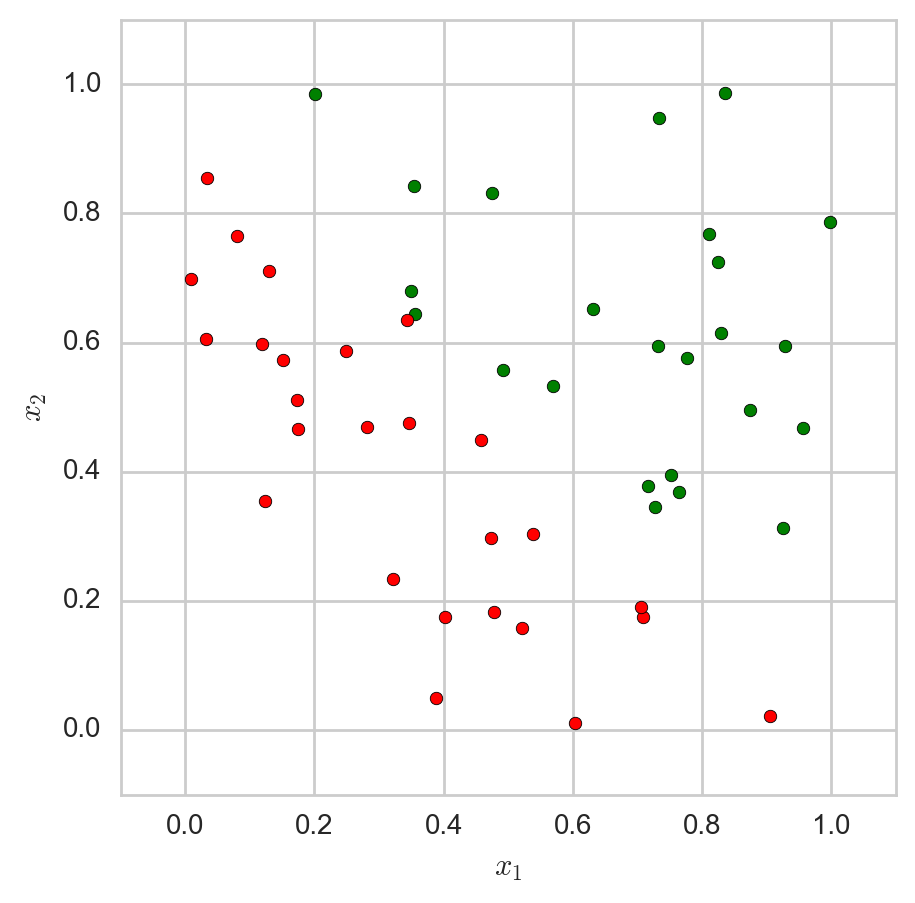

In [13]:
fig = plt.figure(figsize=(5,5))
plot_data(data, fig.gca())

## Iterating the data set

Having the data set we can now code how the perceptron learns it by iterating throu it.

In [14]:
def learn_data(perceptron, data):
    'Returns the number of errors made.'
    count = 0 
    for i, row in data.iterrows():
        count += perceptron.learn(row[0:2], row[2])
    return count

## Visualizing learning

We need now to plot the decision boundary or threshold of the perceptron.

To calculate it we start with the equation that describes the boundary,
$$w_1x_1+w_2x_2 + b =0.$$

From it we can obtain $x_2$ from a given $x_1$ applying a fairy simple math,
$$x_2 = \frac{-w_1x_1-b}{w_2}.$$

In [15]:
def threshold(perceptron, x_1):
    return (-perceptron.weights[0] * x_1 - perceptron.bias) / perceptron.weights[1]

In [16]:
def plot_perceptron_threshold(perceptron, ax):
    xlim = ax.get_xlim(); ylim = ax.get_ylim()
    
    x2s = [threshold(perceptron, x1) for x1 in xlim]
    ax.plot(xlim, x2s)
    
    ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)

A function that plots a perceptron as the threshold and the data set.

In [17]:
def plot_all(perceptron, data, t, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
    plot_data(data, ax)
    plot_perceptron_threshold(perceptron, ax)
    
    ax.set_title('$t='+str(t+1)+'$')

## Our perceptron in action

All set now! Let's create a perceptron and train it. 

**Note**: Normally the initial weights and the bias should be set to *small* random values. I am setting them by hand to a value that I know that looks good in the examples.

In [18]:
perceptron = Perceptron([0.1,-0.1],0.02)

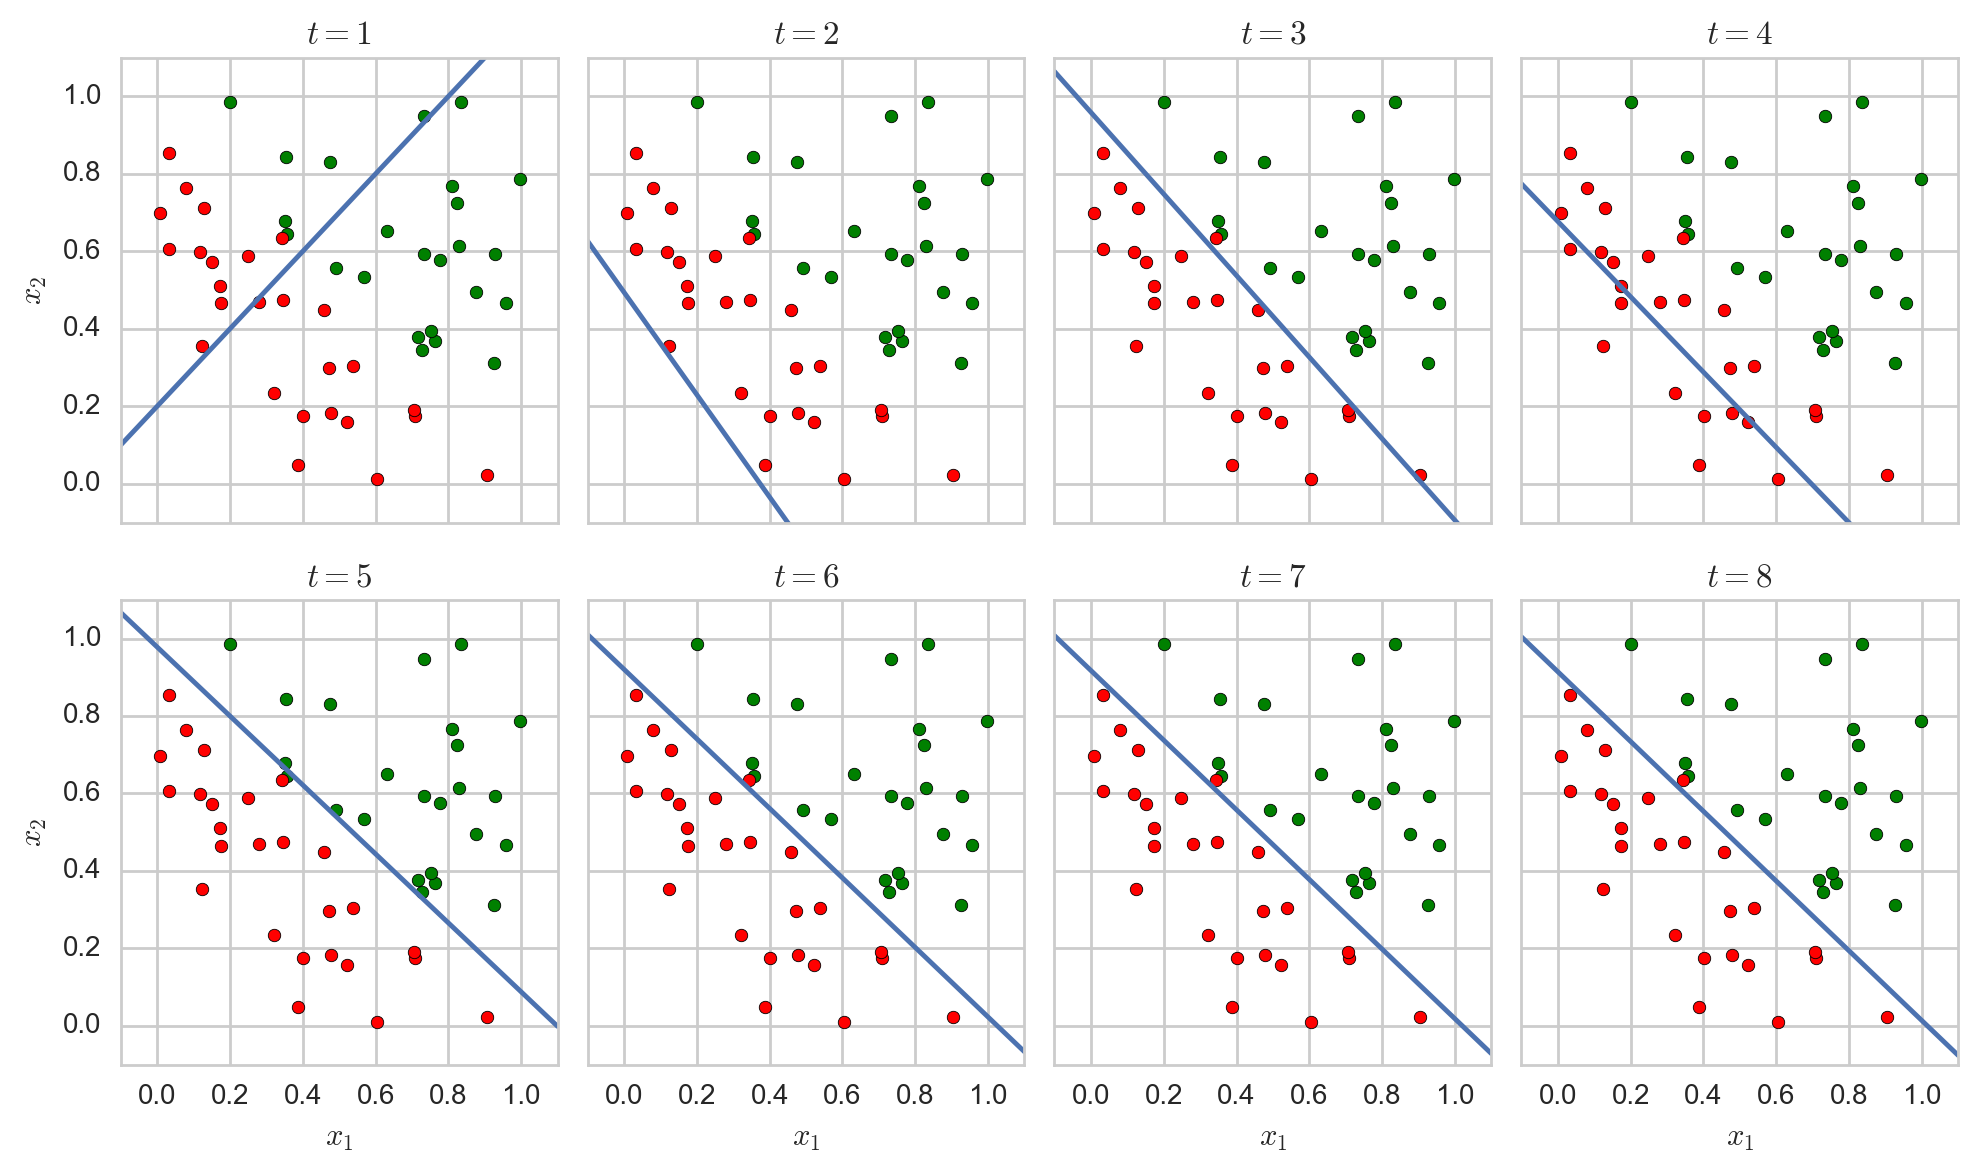

In [19]:
f, axarr = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(10,6))
axs = list(itertools.chain.from_iterable(axarr))
for t in range(8):
    plot_all(perceptron, data, t, ax=axs[t])
    learn_data(perceptron, data)
f.tight_layout()

It is clear how the Perceptron threshold is progresively adjusted according to the data set.

## Animating the Perceptron

This results are better understood in animated from.

In [20]:
from JSAnimation import IPython_display
from matplotlib import animation

In [21]:
def animate(frame_index, perceptron, data, ax):
    ax.clear()
    plot_data(data, ax=ax)
    ax.set_title('$t='+str(frame_index)+'$')
    
    if not frame_index:
        return None
    plot_perceptron_threshold(perceptron, ax=ax)
    learn_data(perceptron, data)
    return None


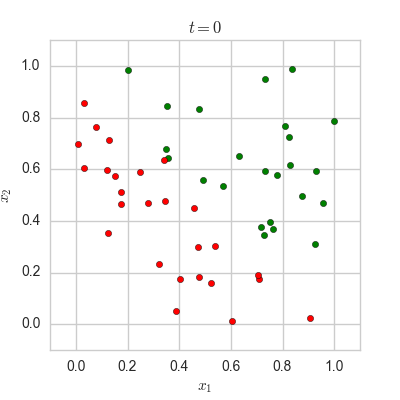
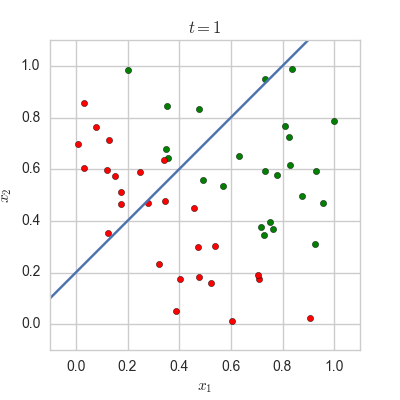
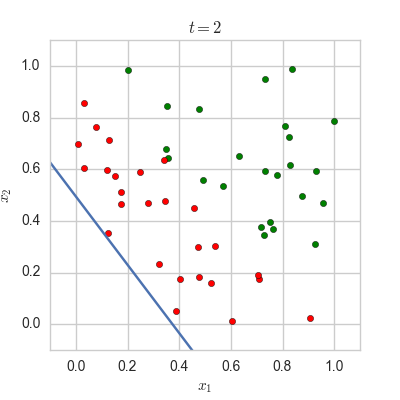
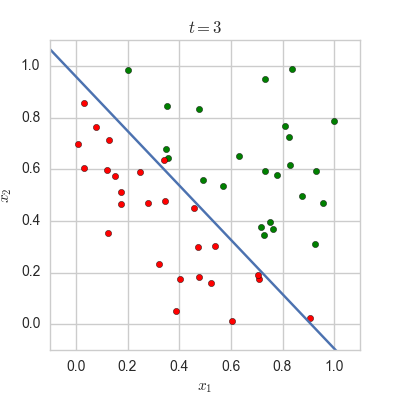
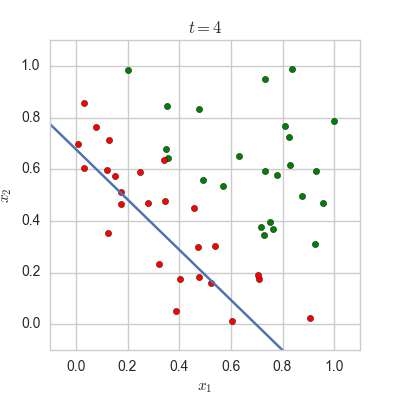
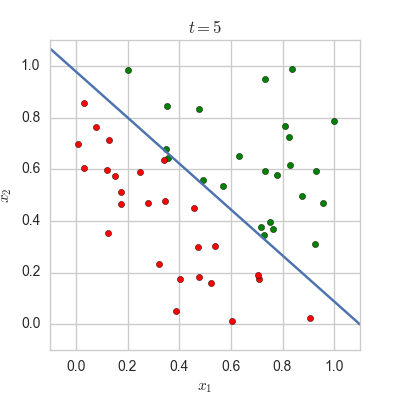
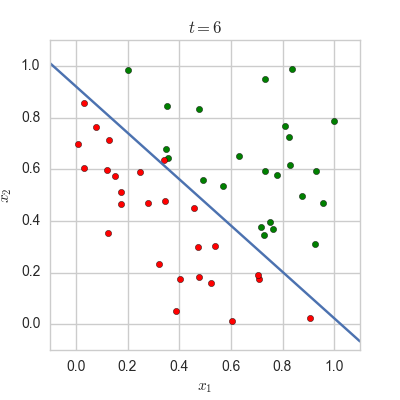
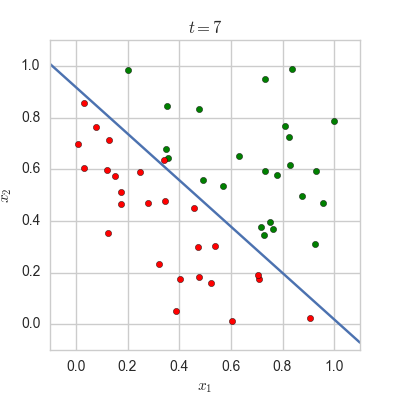
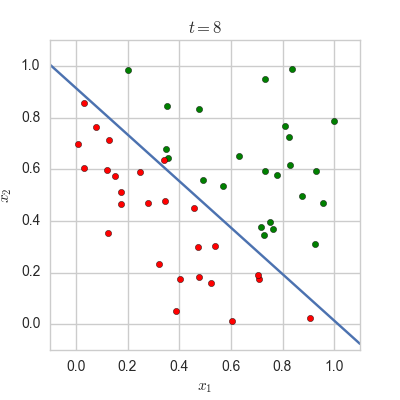
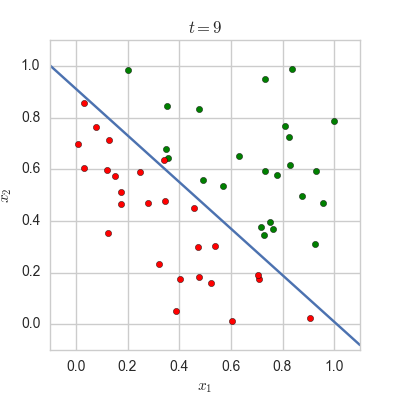

In [22]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
perceptron = Perceptron([0.1,-0.1],0.02)
animation.FuncAnimation(fig, lambda i: animate(i, perceptron, data, ax), frames=10, interval=600, 
                               blit=False)

## Self-study

* Experiment with the learning rate ($\alpha$). How it impacts learning? Do you remember if we have seen another similar parameter in previous classes?
* Create a new data set with a non-linear boundary. What happens now with our perceptron? How would you fix it?

## Suggested reading

* Minsky M. L. and Papert S. A. (1969). *Perceptrons*. Cambridge, MA: MIT Press.
* Gallant, S. I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on Neural Networks, vol. 1, no. 2, pp. 179–191.
* Mikel Olazaran (1996). *A Sociological Study of the Official History of the Perceptrons Controversy*. Social Studies of Science 26 (3): 611–659. doi:10.1177/030631296026003005.

## The XOR issue 

Take a dataset that contains all the possible value combination of the logical XOR function:

In [23]:
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = np.array([1, 1, 0, 0])
N = Y.shape[0]

The data set has ones (represented in black) when $x_1 = 1$ and $x_2 = 0$ or when $x_1 = 0$ and $x_2 = 1$, as defined for the XOR function.

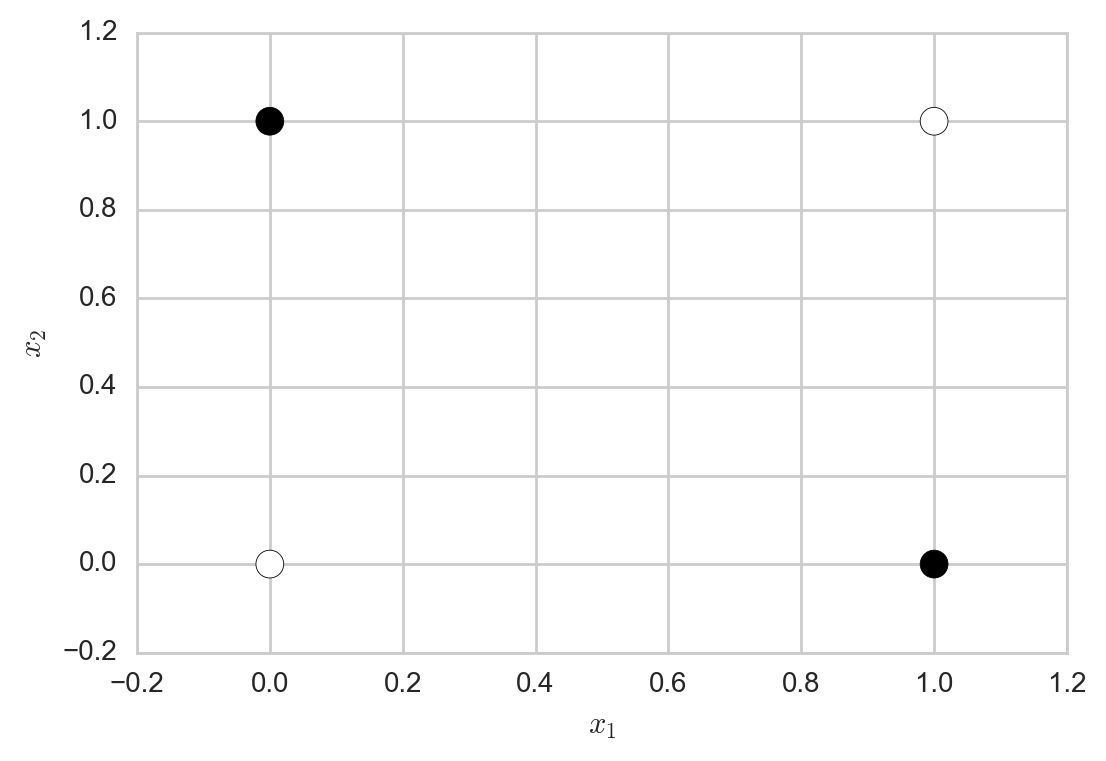

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cm.gray_r, s=100, )
plt.xlabel('$x_1$');plt.ylabel('$x_2$');

It is evident that a perceptron is unable to solve this simple problem as it is only able to separate the space by a hyperplane.

To solve the XOR problem we need to stack perceptrons

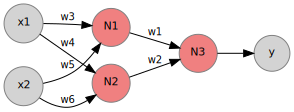

In [25]:
%dotstr open('imgs/05/xor-nn.dot', 'r').read()

But, how can we train the weights from N1 and N2?
* This is known as a credit assigment problem.
* Our current methods can dont determine how the weights of N1 and N2 influence the error.
* Lets visualize it.

### A "handcoded" XOR neural network

Forward propagation for 2 inputs (x1, x2), 2 hidden nodes, 1 output.
* We will be extending the perceptron activation as the logistic (*logit*) function
$$\hat{y} = f(\text{net}) = \frac{1}{1+\exp{\left(-\text{net}\right)}}.$$

In [26]:
def logit(a): return 1.0 / (1+np.exp(-a))

In [27]:
def fprop(x1, x2,
          w1= 0.1, w2= 0.2,  b1= 0.1, 
          w3=-0.2, w4= 0.2,  b2=-0.1,
          w5=-0.3, w6=-0.25, b3=0.2):
    y_hat_1 = logit(b2 + w3*x1 + w4*x2) # N1
    y_hat_2 = logit(b3 + w5*x1 + w6*x2) # N2
    return logit(b1 + w1*y_hat_1 + w2*y_hat_2)

## Error Surface of the XOR Problem

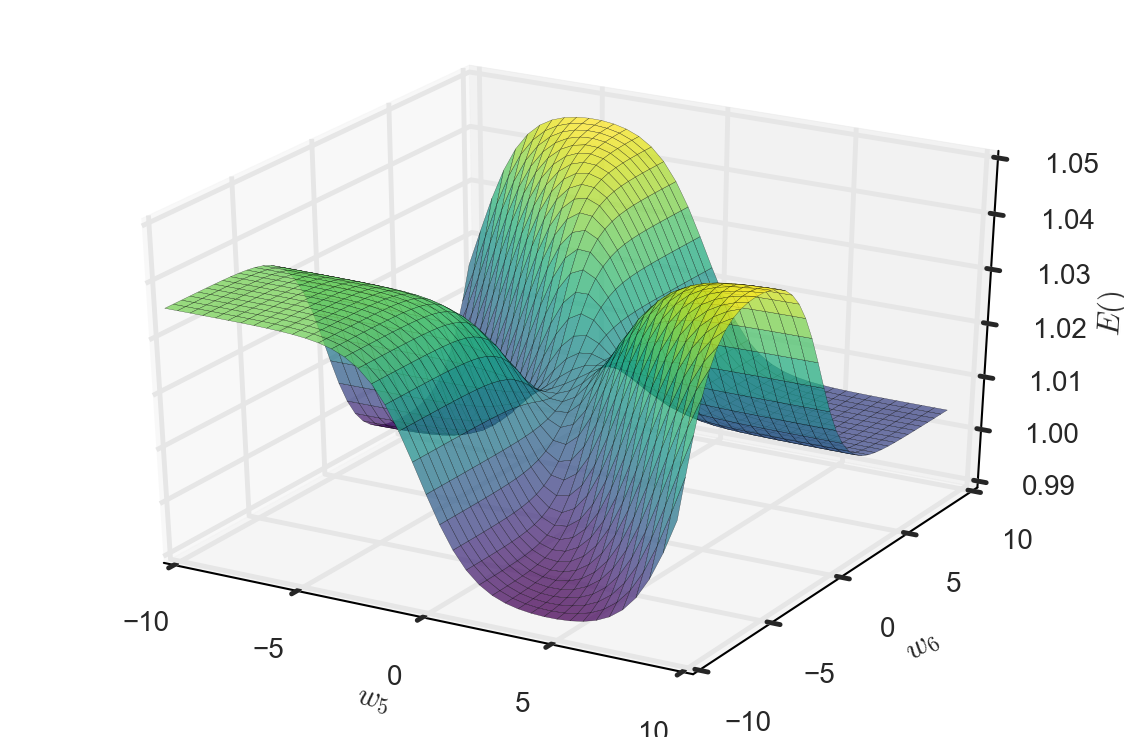

In [28]:
@interact(i=(1,6), j=(1,6)) 
def error_plot(i=5, j=6):
    W1, W2 = np.meshgrid(np.arange(-10, 10, 0.5), np.arange(-10, 10, 0.5))
    E = np.sum([(fprop(X[n, 0], X[n, 1],
                       **{"w%d"%(i) : W1, "w%d"%(j) : W2})-Y[n])**2
                 for n in range(N)], axis=0)
    ax = plt.figure(figsize=(7, 4.5)).add_subplot(111, projection="3d")
    surf = ax.plot_surface(W1, W2, E, rstride=1, cstride=1, cmap=cm.viridis, lw=0.11, alpha=0.74)
    plt.setp(ax, xlabel="$w_%d$" % (i), ylabel="$w_%d$" % (j), zlabel="$E()$");

## Local Minima 

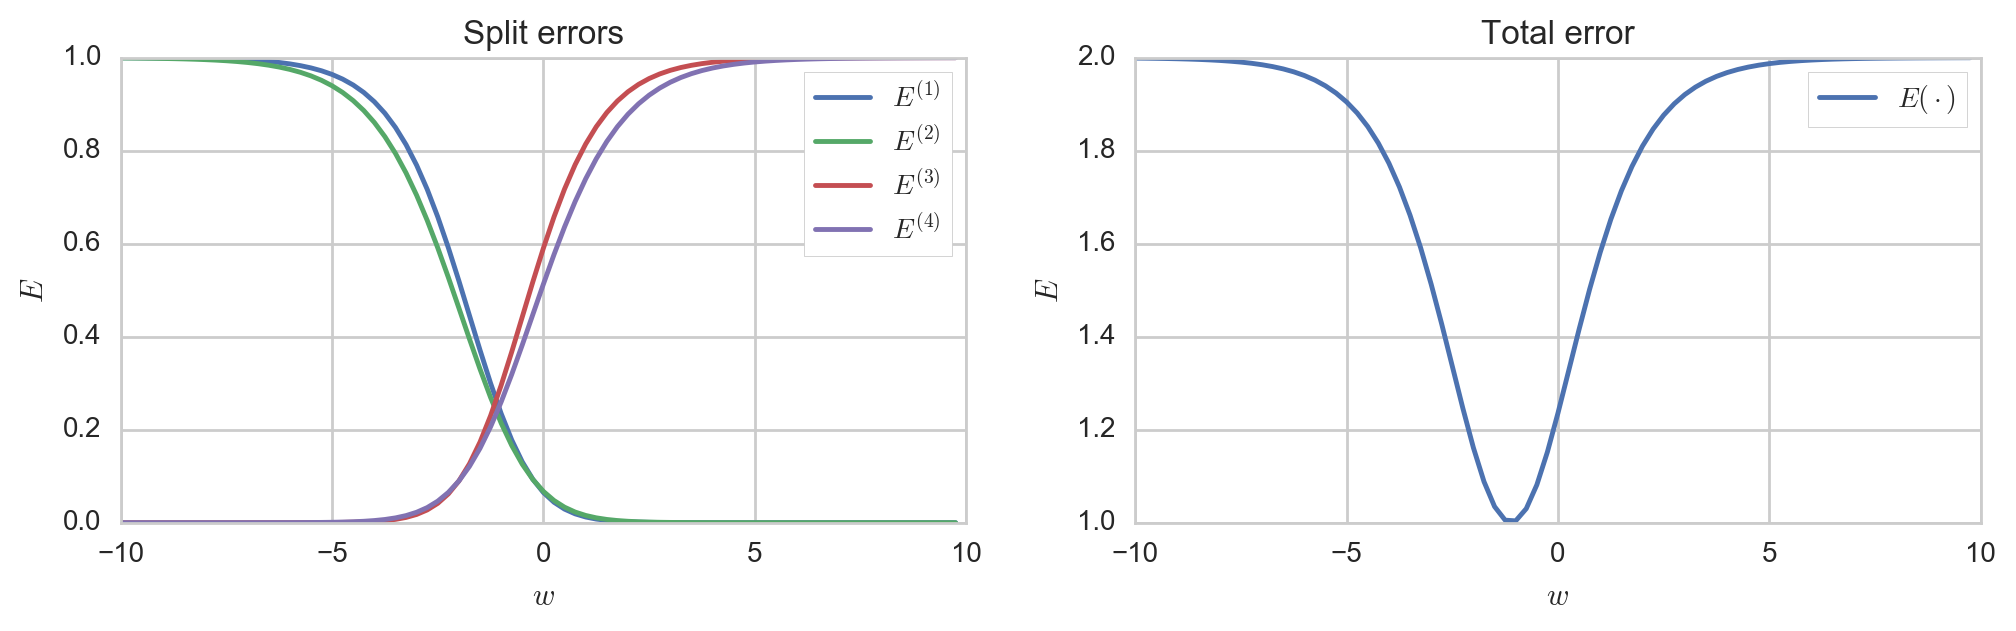

In [29]:
@interact(i=(0,5), j=(0,5)) 
def errors_plot(i=0, j=1):
    plt.figure(figsize=(12, 3))
    W = np.arange(-10, 10, 0.25)
    errors = [(fprop(X[n, 0], X[n, 1], **{"w%d"%(i+1) : W, "w%d"%(j+1) : W+2})-Y[n])**2 for n in range(N)]
    plt.subplot(1, 2, 1)
    for n in range(N): 
        plt.plot(W, errors[n], label="$E^{(%d)}$" % (n+1))
    plt.setp(plt.gca(), xlabel="$w$", ylabel="$E$", title='Split errors');plt.legend(loc="best", frameon=True)
    plt.subplot(1, 2, 2)
    plt.plot(W, np.sum(errors, axis=0), label="$E(\cdot)$")
    plt.setp(plt.gca(), xlabel="$w$", ylabel="$E$", title='Total error');plt.legend(loc="best", frameon=True);

# The Multilayer Perceptron (MLP)

The composition of layers of perceptrons can capture complex relations between inputs and outputs in a hierarchical way.

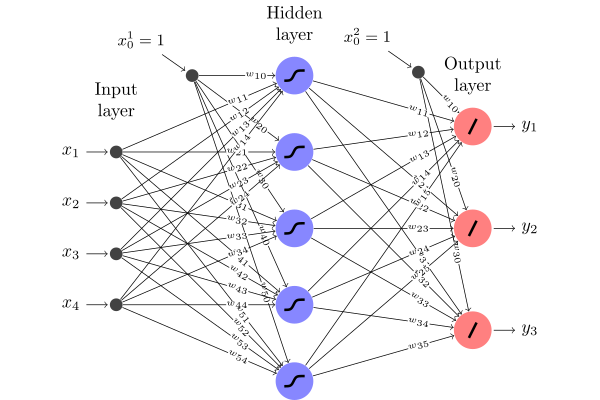

In [30]:
%tikz -s 600,400 -sc 1.0 -l positioning -f svg \input{imgs/05/neural-network.tikz}

...but how can we adapt the weights of the neurons in the hidden layers?

## Improving the notation

In order to proceed we need to improve the notation we have been using. That for, for each layer $1\geq l\geq L$, the activations and outputs are calculated as:

$$\text{net}^l_j = \sum_i w^l_{ji} x^l_i$$
$$y^l_j = f^l(\text{net}^l_j)$$

where

* $y^l_j$ is the $j$th output of layer $l$,
* $x^l_i$ is the $i$th input to layer $l$,
* $w^l_{ji}$ is the weight of the $j$-th neuron connected to input $i$,
* $\text{net}^l_{j}$ is called net activation, and
* $f^l(\cdot)$ is the activation function of layer $l$, e.g. $\tanh()$ in the hidden layers and the identity in the last layer (for regression)

## Error function (SSE)

* For $\Psi=\left\{\left<\vec{x}^{(1)},\vec{y}^{(1)}\right>,\ldots,\left<\vec{x}^{(k)},\vec{y}^{(k)}\right>,\ldots\left<\vec{x}^{(K)},\vec{y}^{(K)}\right>\right\}$

$$
E = 
\frac{1}{2} \sum_{k=1}^{K}{\ell(\hat{\vec{y}}_j^{L}(\vec{x}^{(k)}), \vec{y}^{(k)})} =
\frac{1}{2} \sum_{k=1}^{K} \sum_{j=1}^{m} \left( \hat{y}_j^{L}(\vec{x}^{(k)}) - y_j^{(k)} \right)^2
$$

## Training MLPs with Backpropagation

* Backpropagation of errors is a procedure to compute the **gradient of the error function with respect to the weights** of a neural network.
* We can use the gradient from backpropagation to apply **gradient descent**!

#### A math flashback

The Chain Rule can be applied in composite functions as,
$$
\left( f \circ g\right)'(x) = \left(f\left(g\left(x\right)\right)\right)'= f'\left(g(x)\right)g'(x).
$$
or, in Leibniz notation,
$$
\frac{\partial f\left(g\left(x\right)\right)}{\partial x} =
\frac{\partial f\left(g\left(x\right)\right)}{\partial g\left(x\right)} \cdot
\frac{\partial g\left(x\right)}{\partial x}
$$

The **total derivative** of $f(x_1,x_2,...x_n)$ on $x_i$ is
$$
\frac{\partial f}{\partial x_i}=  
\sum_{j=1}^n{\frac{\partial f}{\partial x_j}\cdot\frac{\partial x_j}{\partial x_i}}
$$

#### To apply gradient descent we need... to calculate the gradients

Applying the chain rule,
$$
\frac{\partial \ell}{\partial w^l_{ji}}=
\color{blue}{\overbrace{\frac{\partial \ell}{\partial \text{net}^l_j}}^{\delta^l_j}}
\color{forestgreen}{\underbrace{\frac{\partial{\text{net}^l_j}}{\partial w^l_{ji}}}_{\frac{\partial\left(\sum_{i}w^l_{ji}x^l_i\right)}{\partial w^l_{ji}}=x^l_i}}
$$
hence we can write
$$
\frac{\partial \ell}{\partial w^l_{ji}}=
\color{blue}{\delta^l_j}
\color{forestgreen}{x^l_i}
$$

#### For the output layer ($l=L$)
$$
\delta^L_j = \frac{\partial \ell}{\partial \text{net}^L_j} =
\color{red}{
  \overbrace{
    \frac{\partial \ell}{\partial\hat{y}^L_j}}^{\frac{\partial\left(\frac{1}{2}\sum_j{\left(y_j\hat{y}^L_j\right)^2} \right)}
    {\partial\hat{y}^L_j}=\left(y_j-\hat{y}^L_j\right)}}
\cdot
\color{magenta}{
\underbrace{\frac{\partial\hat{y}^L_j}{\text{net}^l_j}}_{f'(\text{net}_j^L)}}
=\color{red}{\left(y_j-\hat{y}^L_j\right)}\color{magenta}{f'(\text{net}_j^L)}.
$$
therefore
$$
\frac{\partial \ell}{\partial w^L_{ji}}=
\color{red}{\left(y_j-\hat{y}^L_j\right)}\color{magenta}{f'(\text{net}_j^L)}
\color{forestgreen}{x^L_i}
$$

#### What about the hidden layers ($1\leq l<L$)?

We can express the loss $\ell$ as a function of the activations of the subsequent layer,

$$
\ell = \ell\left(\text{net}^{l+1}_1,\ldots,\text{net}^{l+1}_K\right)
$$

therefore, applying total derivatives,

$$
\frac{\partial \ell}{\partial\hat{y}^l_j} = 
\frac{\partial \ell\left(\text{net}^{l+1}_1,\ldots,\text{net}^{l+1}_K\right)}{\partial\hat{y}^l_j}
$$

#### Applying total derivatives we get

$$
\frac{\partial \ell}{\partial\hat{y}^l_j} = 
\sum_{k}{
\color{orange}{
\overbrace{
\frac{\partial \ell}{\partial\text{net}^{l+1}_k}}^{\delta^{l+1}_k}}
\color{purple}{
\underbrace{\frac{\partial \text{net}^{l+1}_{k}}{\partial\hat{y}^l_j}
}_{\frac{\partial{\sum_{j}{w^{l+1}_{kj}\hat{y}^l_j}}}{\partial\hat{y}^l_j}=w^{l+1}_{kj}}}
} =
\sum_{k}{\color{orange}{\delta^{l+1}_k}\color{purple}{w^{l+1}_{kj}}}
$$

#### Back-propagating the errors to the hidden layer

The $\delta$s of the subsequent layers are used to calculate the $\delta$s of the more internal ones.

$$
\delta^{l}_j =
\frac{\partial\ell}{\partial\text{net}^l_j} =
\overbrace{\frac{\partial\ell}{\partial\hat{y}^l_j}}^
{\sum_{k}{
  \color{orange}{\delta^{l+1}_k}
  \color{purple}{w^{l+1}_{kj}}}}
\color{forestgreen}{\underbrace{\frac{\partial\hat{y}^l_j}{\partial\text{net}^l_j}}_
{f'(\text{net}^l_j)}}=
\sum_{k}{\left(
  \color{orange}{\delta^{l+1}_k}
  \color{purple}{w^{l+1}_{kj}}
  \right)}\color{forestgreen}{f'(\text{net}^l_j)}
$$

# Summarizing

* We now know how to compute the $\frac{\partial\ell}{\partial w^l_ji}$ for all neurons.
* For the neurons on the hidden layers we use the $\delta$s of the next layer.
* We know how to updates the weights as:
$$
\Delta w^l_{ji}=-\eta\frac{\partial\ell}{w^l_{ji}}=-\eta\delta^l_j x^l_i. 
$$

## Difficulties

* There are many **local minima**.
* The optimization problem is **ill-conditioned**.
* There are many **flat regions** (saddle points).
* There is **no guarantee** to reach the global minimum.
* Deep architectures suffer from the **vanishing gradient** problem.
* Neural networks are *usually* considered to be the **blackest box** of all learning algorithms.
* There are sooo many **hyperparameters** (number of layers/nodes, activation function, connectivity, weight initialization, loss function, regularization, ...).
* Training neural networks has been regarded as **black magic** by many researchers.
* And here is the grimoire: [Neural Networks: Tricks of the Trade](http://link.springer.com/book/10.1007%2F978-3-642-35289-8) (1st edition: 1998; 2nd edition: 2012).


## Theoretical features

**Universal approximation theorem**:

> A feed-forward network with **a single hidden** layer containing a finite number of neurons can approximate any continuous functions on compact subsets of $\mathbb{R}^n$, under mild assumptions on the activation function. 

Hornik showed in 1991 that it is not the specific choice of the activation function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators. 

<small>Kurt Hornik (1991) Approximation Capabilities of Multilayer Feedforward Networks, Neural Networks, 4(2), 251–257</small>

There have been three hypes around ANNs:

* Perceptron (50s-XOR problem)
* Backpropagation (80s-SVM)
* Deep Learning (2006-now)

And they work incredibly well in practice.

### But... why do neural nets work well in practice?
* Universal function approximation property.
* Stochastic gradient descent finds **sufficiently good** local minima.
* We don't want to find the global minimum $\implies$ ** fights overfitting!**
* Neural nets learn **feature hierarchies** to represent functions *efficiently*.
    * **features will be learned** automatically
    * allows learning of **hierarchical features** which is much more efficient than just one layer of abstraction
* **multiclass classification** can be integrated with linear complexity (softmax activation function, cross-entropy error function)
* it is a **parametric** model, it does not store any training data directly.

### Drawbacks

* input has to be a **vector of real numbers**, e.g. text must be converted before classification
* in general, the **optimization problem** is very difficult because it is **ill-conditioned** and **non-separable**
* objective function is **not convex**, there are many local minima and flat regions
* **black box**: in most cases it is very difficult to interpret the weights of a neural network although it is possible!
* **catastrophic forgetting**: learning one instance can change the whole network

## Backpropagation in brief

In each layer (we will omit the sample index $k$ and layer $l$)

$$\delta_j = \begin{cases}\hat{y}_j - y_j & \text{in the output layer}\\\\ f'(\text{net}_j) \sum_k \frac{\partial \ell}{\partial \hat{y}_k} & \text{otherwise}\end{cases},$$

$$\frac{\partial \ell}{\partial w_{ji}} = \delta_j x_i;\quad \frac{\partial \ell}{\partial x_i} = \delta_j w_{ji}$$

where

* all nodes $k$ are in the layer after $j$;
* $\text{net}_j$ is known from progagation: $\sum_i w_{ji} x_i$;
* actually you do not have to save $a_j$ because $g'(a_j)$ usually can be computed from $y_j$, e.g.
    * identity function: $f'(\text{net}_j) = 1$,
    * $\tanh$: $f'(\text{net}_j) = 1 - y_j^2$;
* $\frac{\partial \ell}{\partial w_{ji}}$ will be used to update the weight $w_{ji}$ in gradient descent;
* $\frac{\partial \ell}{\partial x_i}$ will be passed to the previous layer to compute the deltas;

**Do not forget to sum up the gradient with respect to the weights for each training example!**

## Efficient Implementation for Fully Connected Layers

* Make sure that you have an efficient **linear algebra library**.
* Organize your data in matrices, i.e.
    * The matrix $\boldsymbol{X}$ contains an input vector in each row. Note that you must expand each row by the bias 1.
    * The matrix $\boldsymbol{T}$ contains an output (of the network) in each row.
* Each layer should have the functions
    * `fprop(W, X, f) -> Y`
    * `backprop(W, X, f_derivative, Y, d_loss/dY) -> d_loss/dX, d_lossdW`

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3" align='center'>
      </div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/05/backprop.svg'/>
      </div>
      </div>
      <div class="col-md-3" align='center'>
      </div>
  </div>
</div>

## Efficient forward propagation

In each layer

$$\boldsymbol{NET} = \boldsymbol{X} \boldsymbol{W}^T$$
$$\boldsymbol{Y} = f(\boldsymbol{NET})$$

where

* $\boldsymbol{Y} \in \mathbb{R}^{N \times J}$ contains an output vector in each row, i.e. $\boldsymbol{Y}_{kj} = y^{(k)}_j$
* $\boldsymbol{X} \in \mathbb{R}^{N \times I}$ contains an input vector (the output of the previous layer) in each row, i.e. $\boldsymbol{X}_{ki} = x^{(k)}_i$
* $\boldsymbol{W} \in \mathbb{R}^{J \times I}$ is the weight matrix of the layer, i.e. $\boldsymbol{W}_{ji}$ is the weight between input $i$ and output $j$.
* $f$ is the activation function (implemented to work with matrices)
* $I$ is the number of inputs, i.e. the number of outputs of the previous layer plus 1 (for the bias)
* $J$ is the number of outputs

**Make sure that you add the bias entry in each row before you pass $Y$ as input to the next layer!**

Error function (SSE)

$$E = \frac{1}{2} ||\boldsymbol{Y} - \boldsymbol{T}||_2^2$$

where

* $||\cdot||_2$ is the [Frobenius norm](http://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm).

# Efficient Backpropagation

In each layer

$$\Delta = f'(\boldsymbol{NET}) \ast \frac{\partial \ell}{\partial \boldsymbol{Y}}$$
$$\frac{\partial \ell}{\partial \boldsymbol{W}} = \Delta^T \cdot \boldsymbol{X}$$
$$\frac{\partial \ell}{\partial \boldsymbol{X}} = \Delta \cdot \boldsymbol{W}$$

where

* $*$ is the [Hadamard product](http://en.wikipedia.org/wiki/Hadamard_product_%28matrices%29) or Schur product or entrywise product
* $\frac{\partial \ell}{\partial \boldsymbol{Y}}$ contains derivatives of the error function with respect to the outputs ($\boldsymbol{Y} - \boldsymbol{T} = \frac{\partial \ell}{\partial \boldsymbol{Y}}$ in the last layer)
* $\frac{\partial \ell}{\partial \boldsymbol{X}} \in \mathbb{R}^{N \times I}$ contains derivatives of the error function with respect to the inputs and will be passed to the previous layer
* $\Delta \in \mathbb{R}^{N \times J}$ contains deltas: $\delta_j^{(n)} = \Delta_{jn}$
* $g'$ is the derivative of $g$ and can be computed based only on $\boldsymbol{Y}$
* $\frac{\partial \ell}{\partial \boldsymbol{W}} \in \mathbb{R}^{J \times I}$ contains the derivatives of the error function with respect to $\boldsymbol{W}$ and will be used to optimize the weights of the ANN

**Make sure that you remove the bias entry in each row before you pass $\frac{\partial \ell}{\partial \boldsymbol{X}}$ to the previous layer!**

## Tips for Your Implementations

* Depending on the problem type you have to select different activiation functions for the output layer.
* Check your gradients with finite differences:
$$\frac{\partial f}{\partial x} = \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2 \varepsilon} + \mathcal{O}(\varepsilon^2)$$

### How to initialize weights $\boldsymbol{w}$?

In [31]:
np.random.randn(10) * 0.05

array([ 0.01136846,  0.01105708,  0.0003728 , -0.10525495, -0.03065331,
       -0.02521697,  0.06946019,  0.03093503, -0.11827013,  0.03369723])

* Draw components of $\boldsymbol{w}$ iid (independend and identically distributed) from a Gaussian distrubition with **small** standard deviation, e.g. 0.05.
* Initialization with 0 will prevent the gradient from flowing back to the lower layers as
$$\frac{\partial \ell}{\partial x_i} = \delta_j w_{ji}$$
* It has been shown that initialization of weights is a key to have good results. See: 
<small>Glorot, X., &amp; Bengio, Y. (2010).**Understanding the difficulty of training deep feedforward neural networks*. Proceedings of the 13th International Conference on Artificial Intelligence and Statistics (AISTATS), 9, 249–256. http://doi.org/10.1.1.207.2059</small>

## Derivatives of Activation Functions

* Identity

$$\hat{y} = f(\text{net}) = a;\quad f'(\text{net}) = 1$$

* Hyperbolic tangent

$$\hat{y} = f(\text{net}) = \tanh(\text{net});\quad f'(\text{net}) = 1 - \tanh^2(\text{net}) = 1-\hat{y}^2$$

* Logistic function

$$y = f(\text{net}) = \frac{1}{1+\exp{\left(-\text{net}\right)}}$$
$$f'(\text{net}) = f(\text{net}) (1 - f(\text{net})) = \hat{y} (1-\hat{y})$$

In [32]:
def plot_afun(x, y, sp_idx, label=None):
    """Plot activation function."""
    ax = plt.subplot(2, 4, sp_idx)
    if label is not None: 
        plt.title(label)
    plt.setp(ax, xlim=(np.min(x), np.max(x)), ylim=(np.min(y)-0.5, np.max(y)+0.5))
    plt.plot(x, y)

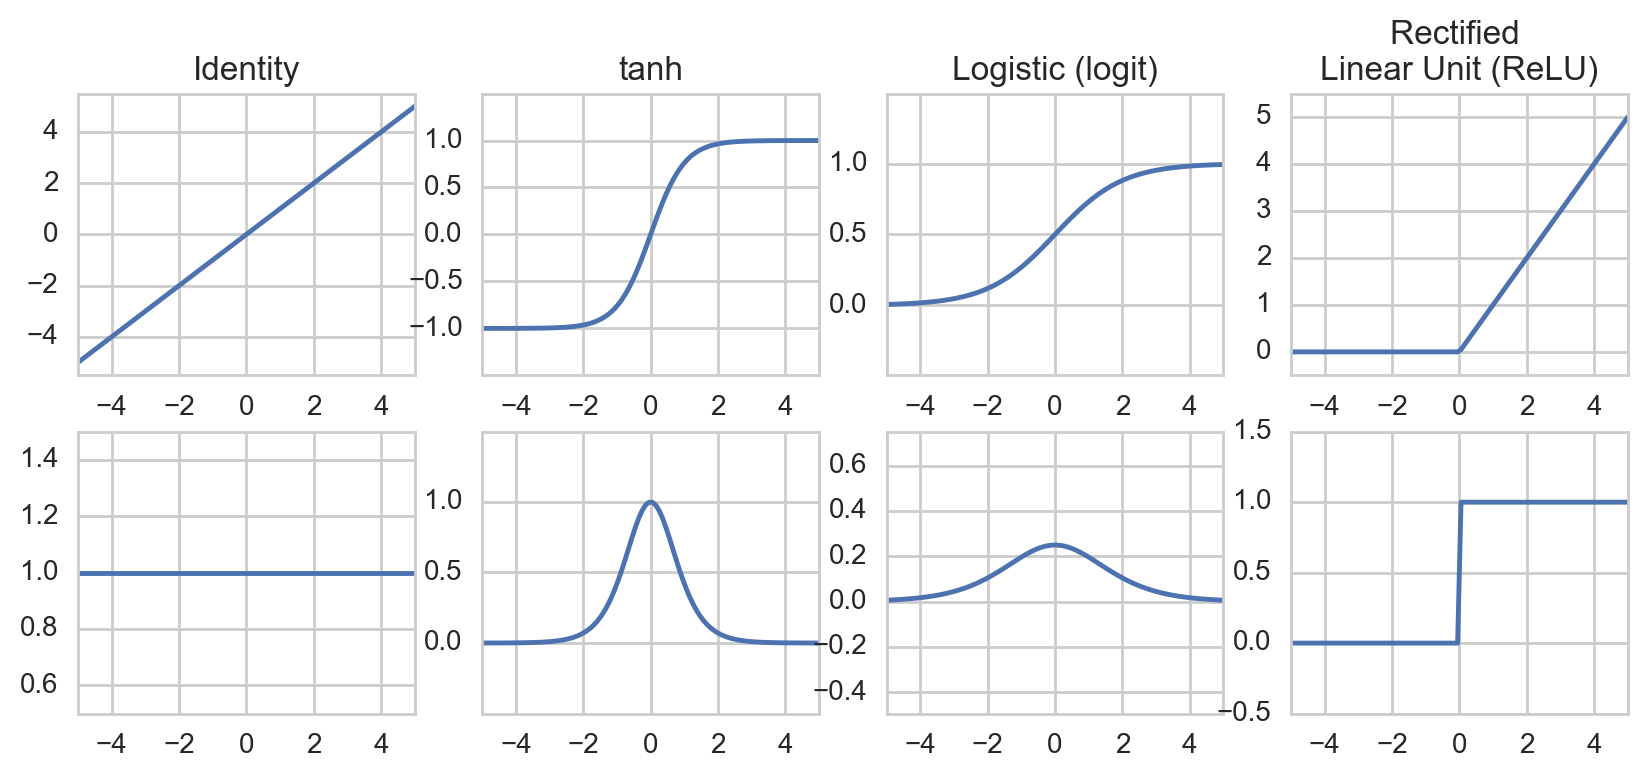

In [33]:
plt.figure(figsize=(10, 4))
x = np.linspace(-5, 5, 100)
plot_afun(x, x, 1, label="Identity")
plot_afun(x, np.tanh(x), 2, label="tanh")
plot_afun(x, logit(x), 3, label="Logistic (logit)")
plot_afun(x, np.max((x, np.zeros_like(x)), axis=0), 4, label="Rectified \nLinear Unit (ReLU)")
plot_afun(x, np.ones_like(x), 5)
plot_afun(x, 1-np.tanh(x)**2, 6)
plot_afun(x, logit(x)*(1-logit(x)), 7)
plot_afun(x, np.max((np.sign(x), np.zeros_like(x)), axis=0), 8)

### Homework:
## Iris flowers classification using MLPs

<div class="container-fluid">
  <div class="row">
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris setosa
      <img src='imgs/05/iris_setosa.jpg'/>
      </div></div>
      <div class='col-md-4' align='center'><div class="well well-sm">
      Iris versicolor
      <img src='imgs/05/iris_versicolor.jpg'/>
      </div></div>
      <div class="col-md-4" align='center'><div class="well well-sm">
      Iris virginica
      <img src='imgs/05/iris_virginica.jpg' width='80%'/>
      </div></div>
  </div>
</div>

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [34]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [35]:
iris_data.keys()

dict_keys(['target', 'feature_names', 'target_names', 'data', 'DESCR'])

In [36]:
n_samples, n_features = iris_data.data.shape
print(n_samples)
print(n_features)
print(iris_data.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [37]:
print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


In [38]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [39]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


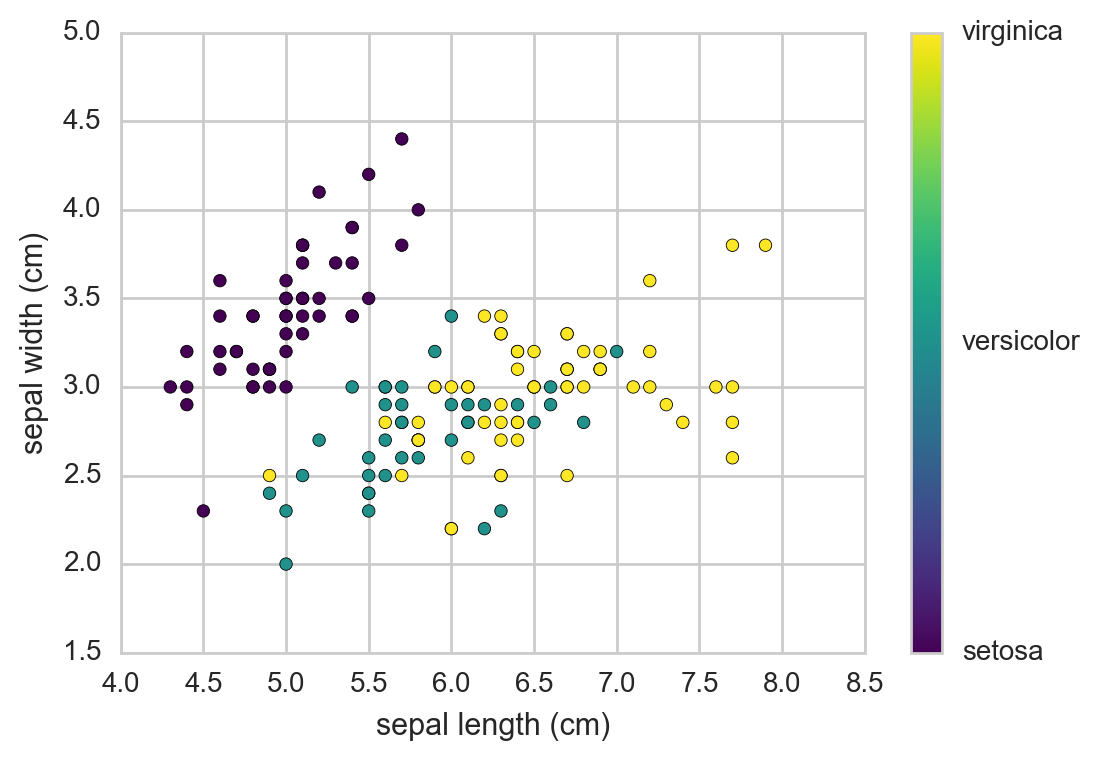

In [40]:
x_index = 0
y_index = 1
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris_data.target_names[int(i)])

plt.scatter(iris_data.data[:, x_index], iris_data.data[:, y_index], c=iris_data.target, cmap=cm.viridis)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris_data.feature_names[x_index]);plt.ylabel(iris_data.feature_names[y_index]);

In [41]:
df = seaborn.load_dataset("iris")

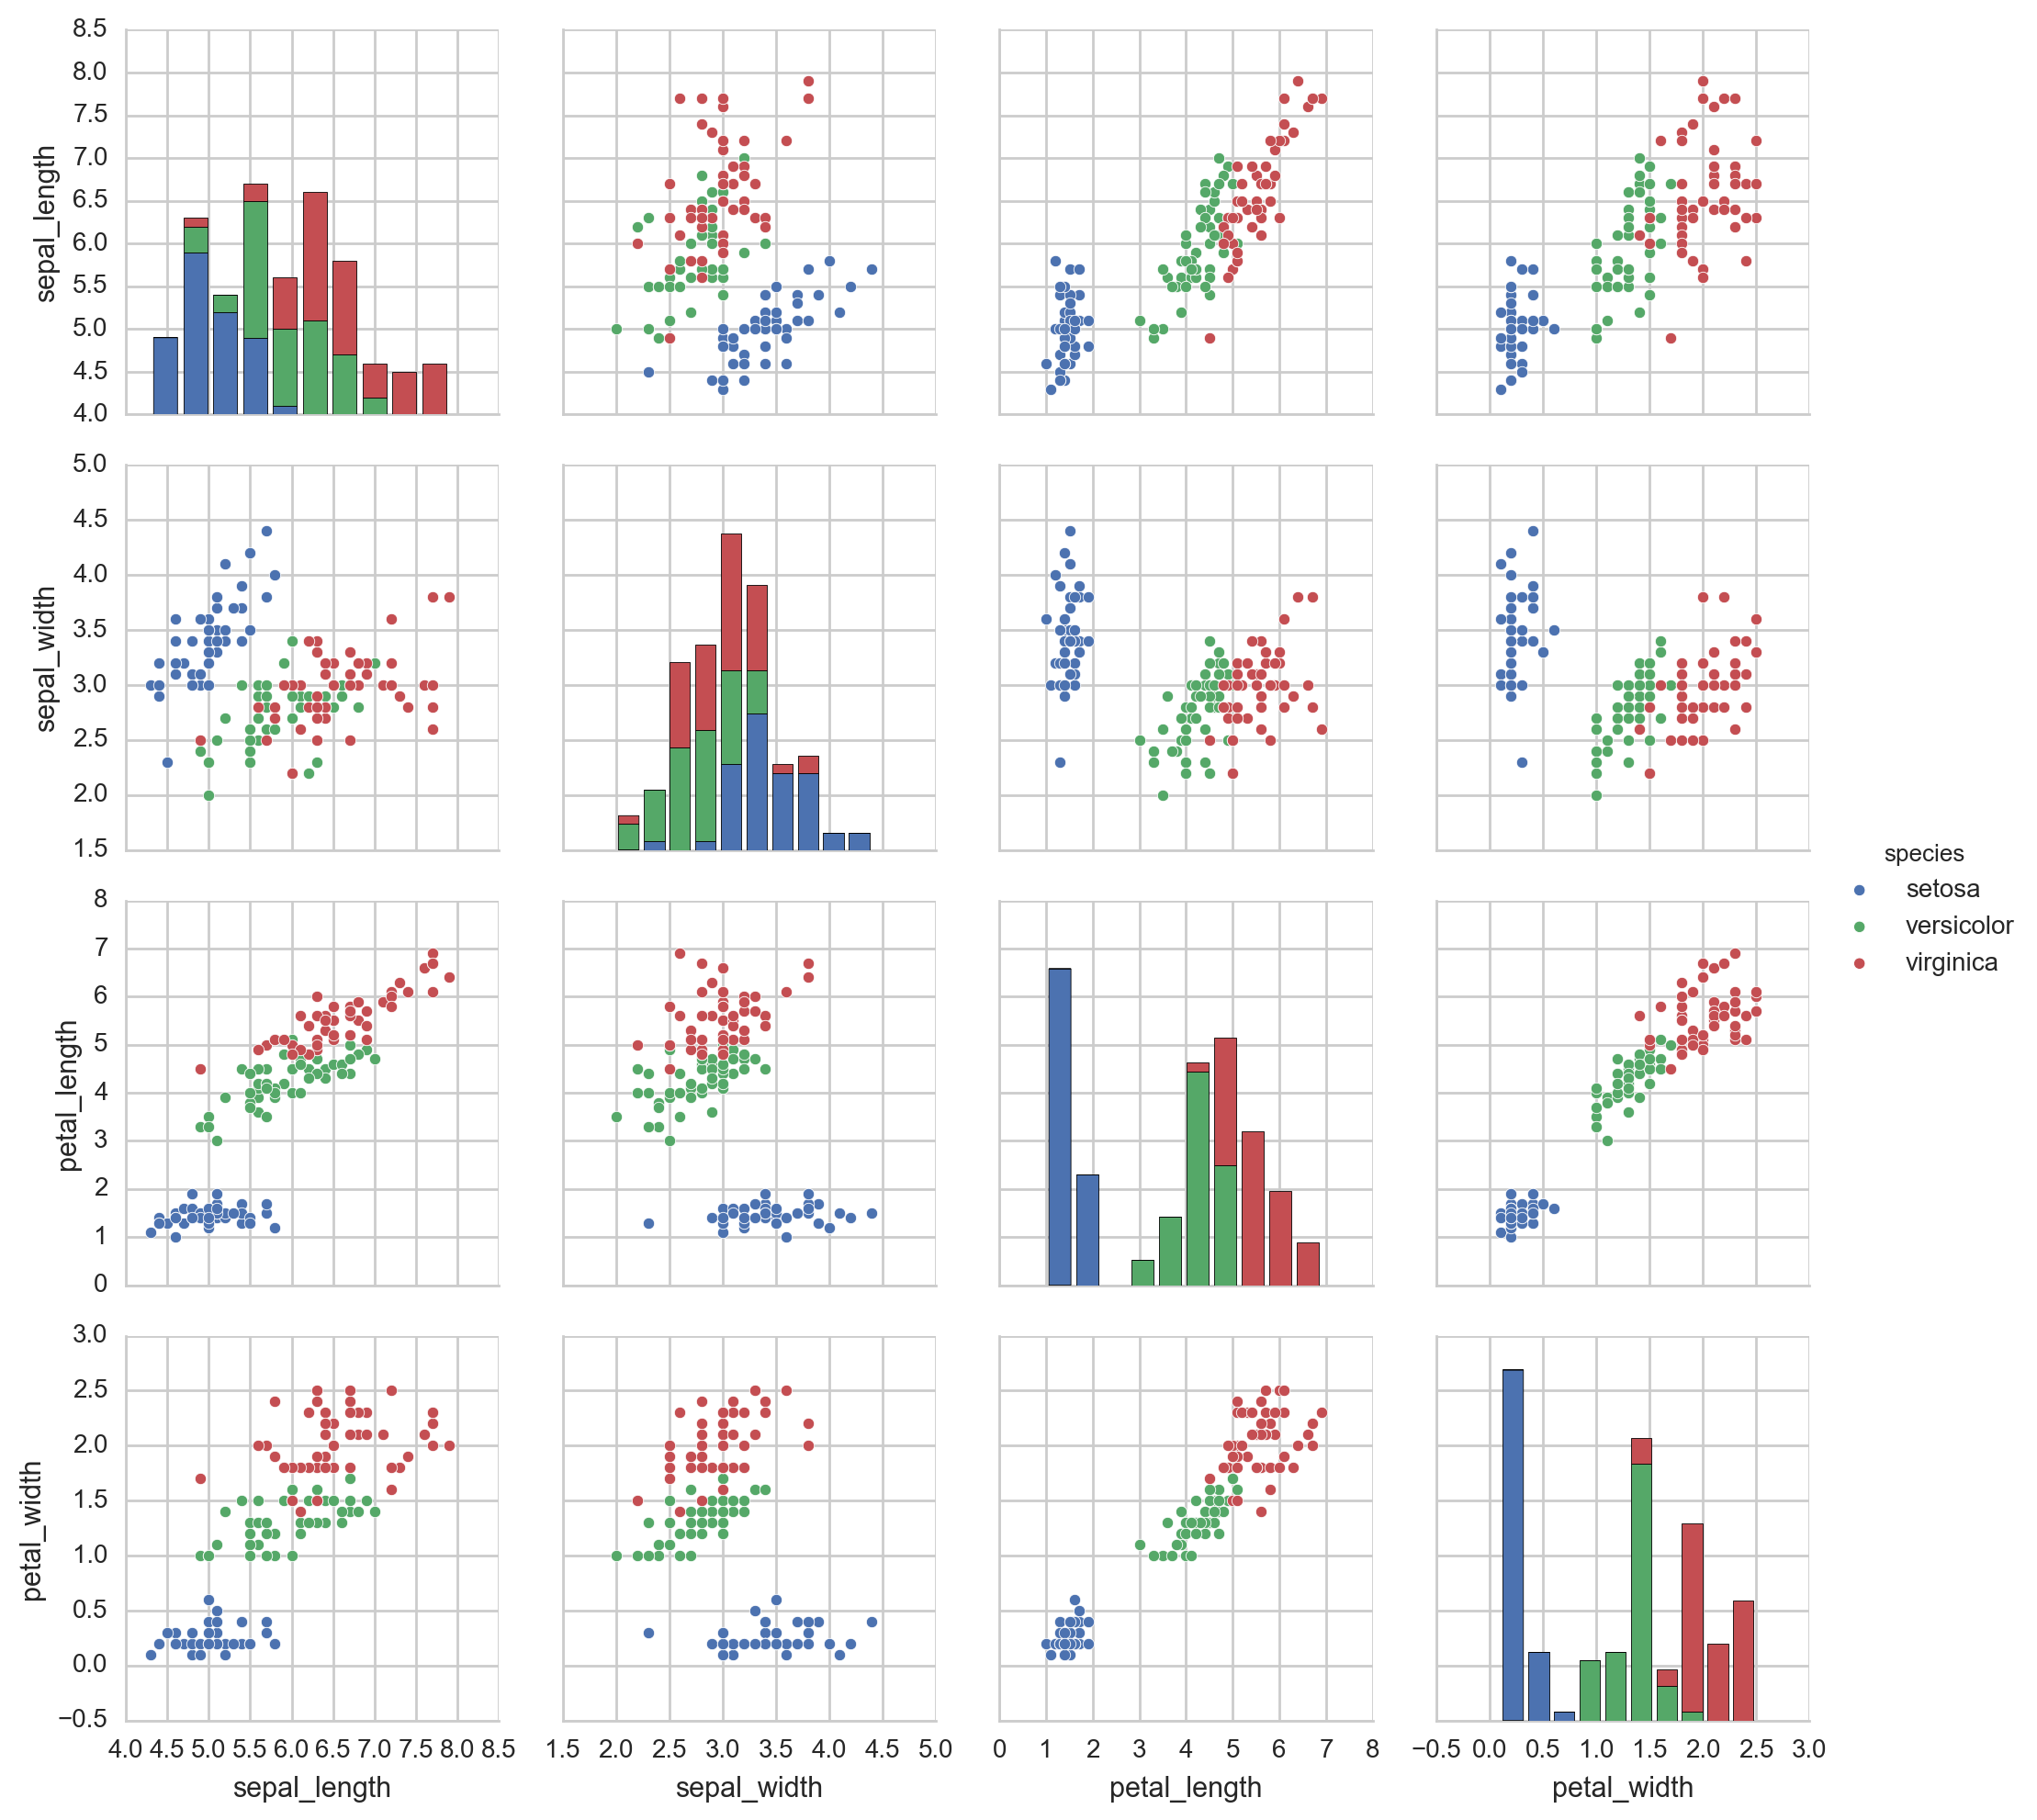

In [42]:
seaborn.pairplot(df, hue="species");

## All set... 
* you have the data!
* you must now program an MLP that learns **recognize** the flowers in the iris dataset. 
* What kind of problem is this?
* Must we transform the data?

In [43]:
class MultilayerPerceptron():
    def __init__(self):
        pass
    
    def propagate(X):
        pass
    
    def learn(X,y):
        pass

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [44]:
%load_ext version_information
%version_information scipy, numpy, matplotlib, sklearn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.0.0 x86_64 i386 64bit
scipy 0.18.1
numpy 1.11.1
matplotlib 1.5.3
sklearn 0.17.1
Thu Sep 29 15:09:44 2016 BRT

In [45]:
# this code is here only for cosmetic reasons
from IPython.core.display import HTML
HTML(open('custom/custom.include', 'r').read())